In [1]:
import import_ipynb
from MyLibrary import *

importing Jupyter notebook from MyLibrary.ipynb


In [2]:
R=[20.0,24.0,28.0,36.0,40.0,44.0,48.0,52.0,60.0,64.0,68.0,72.0,76.0,80.0,84.0,88.0,92.0,96.0]
H=[44.80,45.24,47.57,46.01,52.01,53.41,50.59,51.32,41.92,37.01,34.10,30.04,20.76,12.49,0.95,-9.44,-26.93,-29.75]

In [3]:
def PolFit(A,B,l,r=3):
    M=[[0 for i in range(l)] for j in range(l)]
    N=[[0] for i in range(l)]
    #print(N[2][0])
    for i in range(len(M)):
        for k in range(len(A)):
            N[i][0]+=B[k]*A[k]**i
            for j in range(len(M[0])):
                M[i][j]+=A[k]**(i+j)            
    #print(M)
    MC = copy.deepcopy(M)           
    An=DEqnSolver(M,N,r)
    #print(An)
    #@Rit
    An=Transpose(An)[0]
    #print(An)
    An.reverse()
    #print(An)
    #Ritadip 1911129
    func=makepolfunction(An)
    AN=sorted(A)
    #print(MC)
    YN=[func(i) for i in AN]
    return(AN,YN,MC,An)

In [4]:
X,Y,M,List=PolFit(R,H,3,4)

In [5]:
Display(M)

[18.0, 1072.0, 73760.0]
[1072.0, 73760.0, 5545216.0]
[73760.0, 5545216.0, 440359424.0]


In [6]:
print("The determinant is "+str(GetDetLU(M)))
print("As determinant is not 0, the matrix is invertible.")

The determinant is 747216961502.46
As determinant is not 0, the matrix is invertible.


In [7]:
print("a_0= "+str(List[2])+"\na_1= "+str(List[1])+"\na_2 "+str(List[0]))
print("So, the equation is:\nh(r)= "+str(List[0])+"*r^2 + "+str(List[1])+"*r + "+str(List[2]))

a_0= 5.7241
a_1= 2.31
a_2 -0.0282
So, the equation is:
h(r)= -0.0282*r^2 + 2.31*r + 5.7241


In [8]:
def Func4(r):
    return(List[0]*r**2+List[1]*r+List[2])

In [9]:
r=-List[1]/(2*List[0])
h=Func4(r)
print("The highest point reached by the missile is "+str(h)+" unit.")

The highest point reached by the missile is 53.02995106382979 unit.


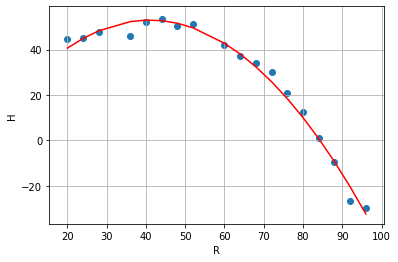

In [10]:
plt.plot(X,Y,"r-")#plot of the graph
plt.scatter(R,H)
plt.xlabel("R")
plt.ylabel("H")
plt.grid()
plt.show()

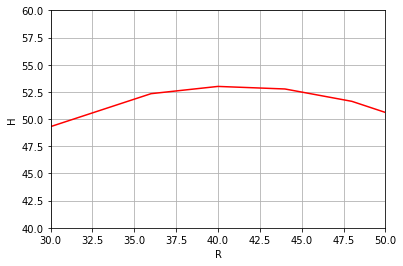

In [11]:
plt.plot(X,Y,"r-")#This is to show peak h value is near 53, we can zoom into it more by changingthe limits
plt.xlim(30,50)
plt.ylim(40,60)
plt.xlabel("R")
plt.ylabel("H")
plt.grid()
plt.show()